# Simple dynamic characterization

In this example, there is a very simple database containing only one node with a pulse emission of CH4 without any extra temporal distributions.


In [1]:
from example_databases import *

db_dynamic_cf_test()

ModuleNotFoundError: No module named 'example_databases'

In [2]:
demand = {("test", "A"): 1}
gwp = ("GWP", "example")

In [3]:
from timex_lca import TimexLCA

In [4]:
mlca = TimexLCA(demand, gwp)

Calculation count: 0


/Users/timodiepers/Documents/Coding/timex/timex_lca/timex_lca.py:75: UserWarning: No database_date_dict provided. Treating the databases containing the functional unit as dynamic. No remapping to time explicit databases will be done.
  warnings.warn(
/Users/timodiepers/Documents/Coding/timex/timex_lca/timex_lca.py:86: UserWarning: No edge filter function provided. Skipping all edges within background databases.
  warnings.warn(


In [5]:
mlca.build_timeline()

/Users/timodiepers/Documents/Coding/timex/timex_lca/timeline_builder.py:164: Warning: No time-explicit databases are provided. Mapping to time-explicit databases is not possible.
  warnings.warn(


,date_producer,producer_name,date_consumer,consumer_name,amount,interpolation_weights
0,2024-01-01,A,2024-01-01,-1,1.0,None


In [6]:
mlca.lci()

In [7]:
mlca.static_lcia()
mlca.static_score

28.40999984741211

`timex` allows to calculate radiative forcing [W/m2] and GWP [kg CO2eq] over fexible time horizons (TH). Default TH is 100 years.

The TH of analysis can be flexible (fixed_TH == False), which calculates the warming for the duration of TH from the timing each each emission or it can be fixed (fixed_TH), which harmonizes the duration of impact calculation to duration of TH starting from the functional unit. This means that emissions occuring later than the functional unit are counted for a shorter time (less impact) and emission occuring earlier are counted for a longer time (more impact). See more information in Levasseur 2010.


Calculate dynamic emissions for radiative forcing, flexible TH and 100 years TH (default)


In [8]:
from timex_lca.dynamic_characterization import characterize_ch4

In [9]:
characterization_function_dict = {bd.get_node(code="CH4").id: characterize_ch4}

mlca.dynamic_lcia(
    metric="radiative_forcing",
    fixed_time_horizon=False,
    characterization_function_dict=characterization_function_dict,
)

,date,amount,flow,flow_name,activity,activity_name,amount_sum
0,2024-12-31 05:49:12,1.922234e-13,2,methane,4,"(test, A)",1.922234e-13
1,2025-12-31 11:38:24,1.766044e-13,2,methane,4,"(test, A)",3.688278e-13
2,2026-12-31 17:27:36,1.622546e-13,2,methane,4,"(test, A)",5.310824e-13
3,2027-12-31 23:16:48,1.490707e-13,2,methane,4,"(test, A)",6.801531e-13
4,2028-12-31 05:06:00,1.369581e-13,2,methane,4,"(test, A)",8.171112e-13
...,...,...,...,...,...,...,...
94,2119-01-01 00:54:00,6.670712e-17,2,methane,4,"(test, A)",2.364951e-12
95,2120-01-01 06:43:12,6.128689e-17,2,methane,4,"(test, A)",2.365012e-12
96,2120-12-31 12:32:24,5.630707e-17,2,methane,4,"(test, A)",2.365068e-12
97,2121-12-31 18:21:36,5.173189e-17,2,methane,4,"(test, A)",2.365120e-12


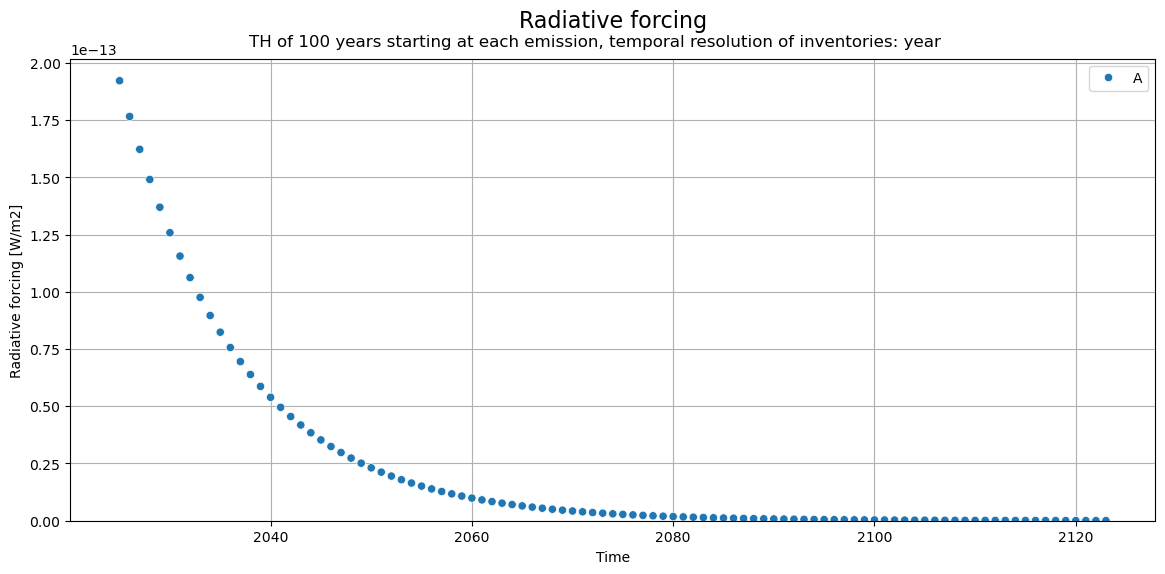

In [10]:
mlca.plot_dynamic_characterized_inventory()

In [11]:
print(
    f"characterized dynamic score: {mlca.dynamic_score} [{mlca.metric} ({mlca.time_horizon} {mlca.temporal_grouping})]"
)

characterized dynamic score: 2.3651673669270527e-12 [radiative_forcing (100 year)]


We can also calculate dynamic emissions for GWP, flexible TH and 100 years TH (default)


/Users/timodiepers/Documents/Coding/timex/timex_lca/dynamic_characterization.py:157: UserWarning: Using timex' default co2 characterization function for GWP reference.
  warnings.warn(


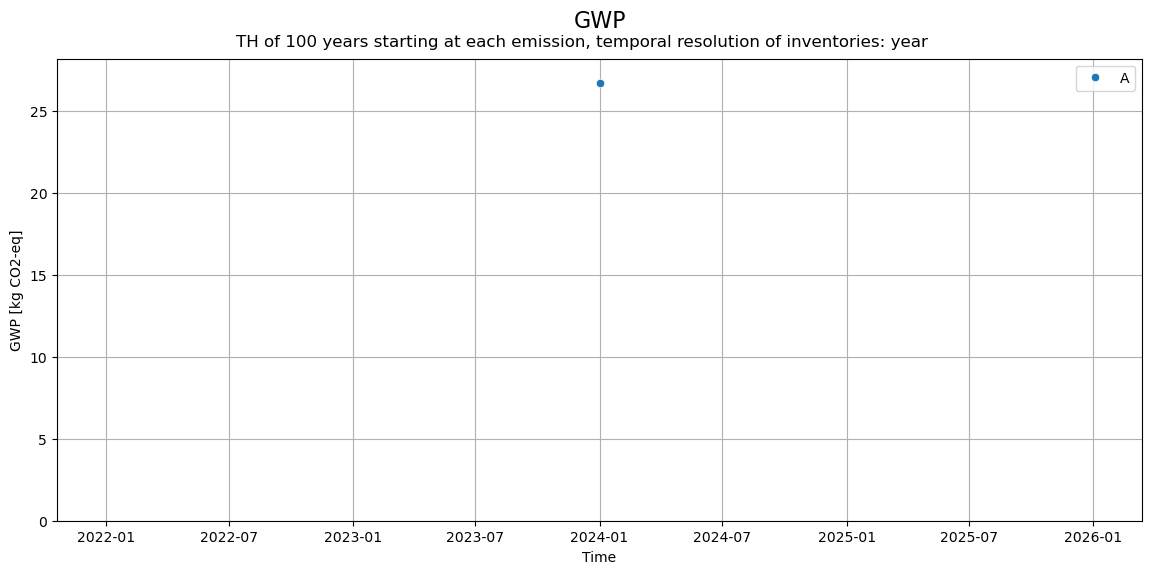

characterized dynamic score: 26.705808501447027 [GWP (100)]


In [12]:
mlca.dynamic_lcia(
    metric="GWP",
    time_horizon=100,
    fixed_time_horizon=False,
    characterization_function_dict=characterization_function_dict,
)
mlca.plot_dynamic_characterized_inventory()
print(
    f"characterized dynamic score: {mlca.dynamic_score} [{mlca.metric} ({mlca.time_horizon})]"
)